# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


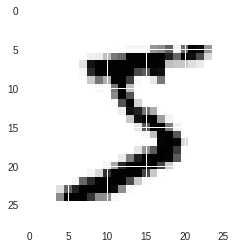

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
y_train[:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
from keras.layers import Activation
model = Sequential()

 
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                46090     
Total params: 55,658
Trainable params: 55,658
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.1586 - acc: 0.9528
Epoch 2/10
49568/60000 [=======================>......] - ETA: 3s - loss: 0.0645 - acc: 0.9806

60000/60000 [==============================] - 22s 362us/step - loss: 0.0632 - acc: 0.9808
Epoch 3/10
60000/60000 [==============================] - 22s 360us/step - loss: 0.0466 - acc: 0.9861
Epoch 4/10
12096/60000 [=====>........................] - ETA: 17s - loss: 0.0351 - acc: 0.9900

60000/60000 [==============================] - 22s 358us/step - loss: 0.0389 - acc: 0.9878
Epoch 5/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0320 - acc: 0.9898
Epoch 6/10
  928/60000 [..............................] - ETA: 21s - loss: 0.0174 - acc: 0.9935

60000/60000 [==============================] - 21s 357us/step - loss: 0.0276 - acc: 0.9911
Epoch 7/10
57312/60000 [===========================>..] - ETA: 0s - loss: 0.0237 - acc: 0.9920

60000/60000 [==============================] - 21s 358us/step - loss: 0.0238 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.0223 - acc: 0.9930
Epoch 9/10
14304/60000 [======>.......................] - ETA: 16s - loss: 0.0174 - acc: 0.9945

60000/60000 [==============================] - 22s 358us/step - loss: 0.0196 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0175 - acc: 0.9940


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.03696008974986034, 0.9903]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[9.3583317e-15 1.2453511e-15 7.9595532e-12 7.1728272e-09 1.0719244e-20
  1.2110034e-13 7.8936775e-24 1.0000000e+00 1.2283957e-12 7.4410506e-10]
 [1.2911679e-10 1.2901015e-07 9.9999988e-01 1.6184680e-14 3.5359895e-14
  5.0267806e-16 1.2621995e-09 2.4385126e-14 1.1932692e-11 1.7187951e-12]
 [3.8153459e-08 9.9993932e-01 3.0459116e-06 4.0329301e-08 2.6059311e-05
  1.4787067e-06 6.3964922e-07 1.1487742e-05 1.7833725e-05 9.9963060e-08]
 [9.9999940e-01 1.9592196e-14 2.5411842e-07 2.2930573e-09 2.6487092e-12
  4.9068422e-08 2.0725710e-07 8.1001977e-10 2.0174623e-08 7.5836631e-08]
 [3.0233452e-12 3.8936312e-14 1.3456956e-10 1.3982327e-13 9.9999917e-01
  1.2108759e-12 7.5294491e-13 7.4600694e-11 8.5415869e-10 8.0493140e-07]
 [1.8508338e-08 9.9939144e-01 9.8248415e-07 7.8610567e-09 8.7478256e-05
  1.4134613e-07 1.2481399e-08 4.3487531e-04 8.4320265e-05 7.1494145e-07]
 [1.3276985e-15 1.9690914e-11 8.8884820e-09 9.5019966e-13 9.8842490e-01
  5.6809569e-07 8.1372253e-14 9.5438693e-08 1.1490067e-02 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

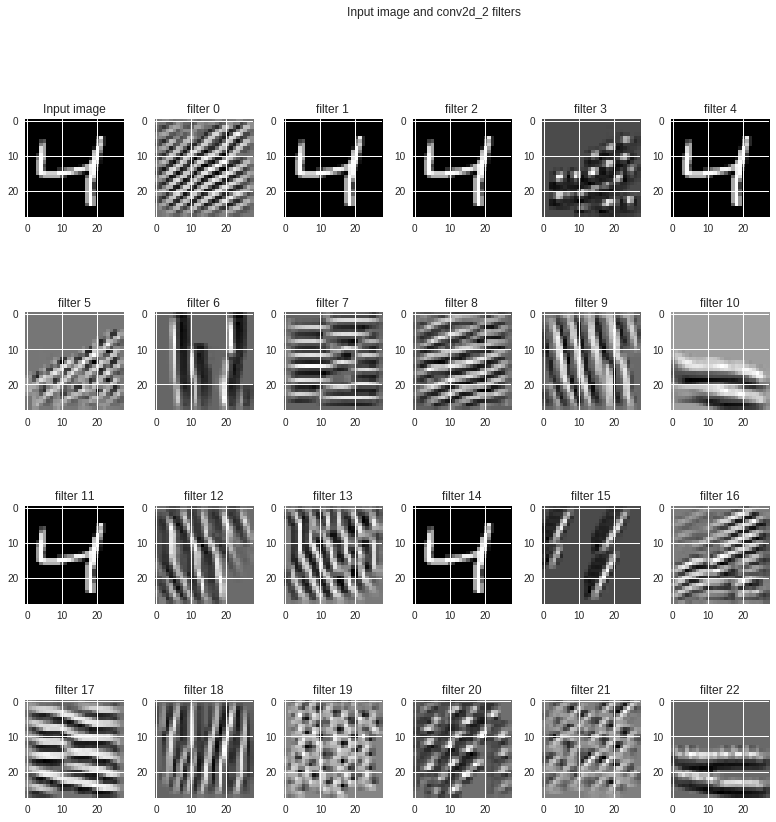

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()